In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
from torchvision import datasets
from torchvision import transforms
import torchvision
import os
import numpy as np
import matplotlib
#matplotlib.use('agg')
import matplotlib.pyplot as plt
import torchvision.utils as tutils
import imageio
import pickle
import copy
from PIL import Image
import h5py 
from torch.utils.data import Dataset, DataLoader
from matplotlib.pyplot import imshow
import pandas as pd

In [4]:
def show(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)), interpolation='nearest')
    
def denorm(x):
    out = (x + 1) / 2
    return out.clamp(0, 1)

In [5]:
# Loading Real images
realImageDir = './data/real-Cropped/'
realNoisySHcsv = './data/sh_real/RealImage_Celeb_000_SH.csv'
realNoisySH = pd.read_csv(realNoisySHcsv, sep = ',', header = None)

In [11]:
# Load real images
imgDim = 64
batch_size = 1
transform = transforms.Compose([
        transforms.Resize(imgDim),
        transforms.ToTensor(),
        transforms.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
])

dataset = datasets.ImageFolder(realImageDir, transform)
real_image_data_loader = torch.utils.data.DataLoader(dataset,batch_size=batch_size, shuffle=False)


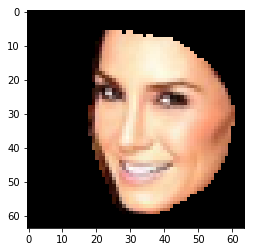

In [17]:
dreal = next(iter(real_image_data_loader))
show(denorm(dreal[0][0]))